In [7]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm

sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os

In [8]:
# Reading data
smp=Table.read('../LumMatch/LumMatch.fits')


iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12 = smp['z_dr12']
plate = smp['Plate']
mjd = smp['MJD']
fiber =  smp['FiberID']
X_0=np.array(list(zip(iW3_0, rew_0)))
# (X_scaled, mean_X, std_X) = scale(X_0)
# X, m, r =erqScaling.MinMaxScaler(X_0)
X = X_0
x_erq =  4.6  #(4.6-np.min(iW3_0))/(np.max(iW3_0)-np.min(iW3_0))
y_erq = 2  #(2- np.min(rew_0))/(np.max(rew_0)-np.min(rew_0))
Main_center = np.median(X, axis=0)
ERQ= X[(iW3_0>=x_erq) & (rew_0>=y_erq)]

print(Main_center)

[2.48684618 1.55534221]


In [9]:
enclosing_ratio=0.85
bw=3 # bandwidth ratio for the default value
resolution=100
coeff=1.05
dir = 'outData/%.2f/bw-%.2f/enc-r-%.2f' %(coeff, bw, enclosing_ratio)
if os.path.exists(dir)==False:
    os.system('mkdir -p ' + dir)
# os.chdir(dir)
ERQ_vector = np.median(ERQ, axis=0) - np.median(X, axis=0)
ERQ_direction = erqMedSpec.modified_arctan(ERQ_vector[0], ERQ_vector[1])
edge = []
opening_angle= np.deg2rad(8.5)
# print(ERQ_direction)
cen= np.median(X_0,axis=0)
A = [8.01429, 2.27435]
lA = np.linalg.norm(A-cen)
dirA =  erqMedSpec.modified_arctan(A[0], A[1])
# A[0] = cen[0] + lA*np.cos(dirA)
# A[1] = cen[1] +lA*np.sin(dirA)
B=[0,0]
B[0] = cen[0]+ lA*np.cos(ERQ_direction+opening_angle*0.5)
B[1] = cen[1] + lA*np.sin(ERQ_direction+opening_angle*0.5)
print(cen, lA)

[2.48684618 1.55534221] 5.574011782685593


wedge-direction= 0.20810135506420965 ratio= 0.85
KDE density estimation in 2D...
Contour plot...
100%|██████████| 7/7 [00:00<00:00, 70.07it/s]
plotting


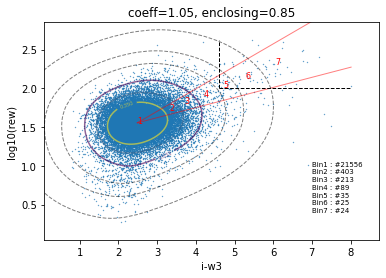

tip_pop 21556


In [10]:
ngrids=100
levels =  coeff*np.array([ 1/32, 1/8, 1/3])
wdg=0

ymax,ymin = np.max(rew_0), np.min(rew_0)
xmax, xmin = np.max(iW3_0), np.min(iW3_0)
wedge_direction = ERQ_direction

print('wedge-direction=', wedge_direction, 'ratio=', enclosing_ratio)

    
bin_label, bin_pop, tip_label = erqMedSpec.KDE_Bin2D(X, x_erq, y_erq,\
                                              ngrids,  bw, levels, \
                                              A, B, \
                                              x_erq, y_erq,\
                                              True,[1.4,  1.7, 2.2],\
                                              dir+'/Bins-ratio-%.2f-bw-%.2f-wdg-%1d.png'\
                                              %(enclosing_ratio, bw, wdg), \
                                              True, 'i-w3','log10(rew)', \
                                              'coeff=%.2f, enclosing=%.2f' %(coeff, enclosing_ratio))
np.savetxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt', bin_label)
np.savetxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt', bin_pop)
# np.savetxt(dir + '/tip_label_bw-%.2f' %(bw), tip_label)


In [11]:
#  Med-Spec
# tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
mask = (tip_label==1)
tipSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask]) 

bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')

nBin = 7
for b in range(1,nBin+1):
    if(b==1):
        medSpec = tipSpec
        np.savetxt(dir+'/med-spec-bw-%.2f-wdg-%d-bin-%d.txt' %(bw, wdg, b), medSpec)
    else:
        mask = (bin_label==b)
        medSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask])
        np.savetxt(dir +'/med-spec-bw-%.2f-wdg-%d-bin-%d.txt' %(bw, wdg, b), medSpec)


 98%|█████████▊| 21117/21556 [48:09<01:08,  6.39it/s]

bin: 1 1000 to 1980
bin: 2 1000 to 1980
bin: 3 1000 to 1980
bin: 4 1000 to 1980
bin: 5 1000 to 1980
bin: 6 1000 to 1980
bin: 7 1000 to 1980


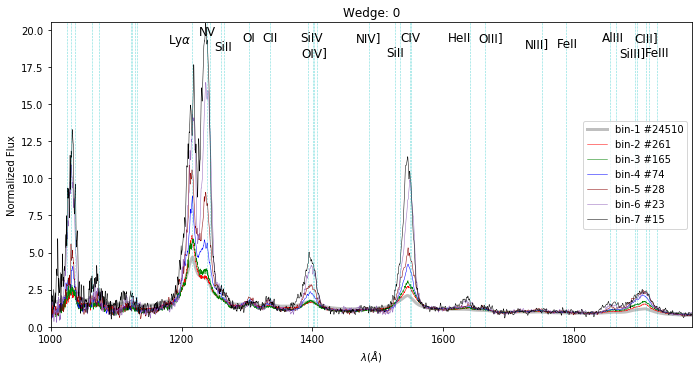

bin: 1 1150 to 1980
bin: 2 1150 to 1980
bin: 3 1150 to 1980
bin: 4 1150 to 1980
bin: 5 1150 to 1980
bin: 6 1150 to 1980
bin: 7 1150 to 1980


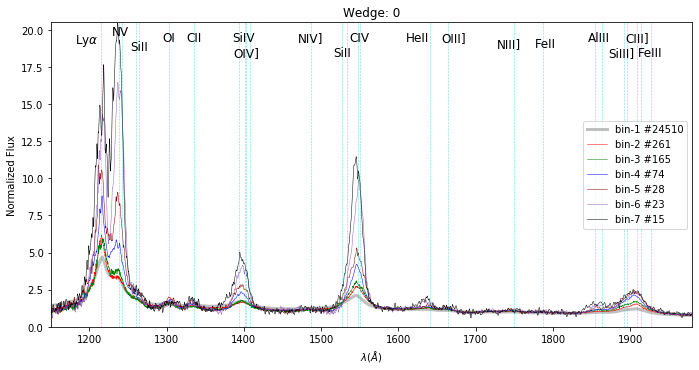

bin: 1 1150 to 2850
bin: 2 1150 to 2850
bin: 3 1150 to 2850
bin: 4 1150 to 2850
bin: 5 1150 to 2850
bin: 6 1150 to 2850
bin: 7 1150 to 2850


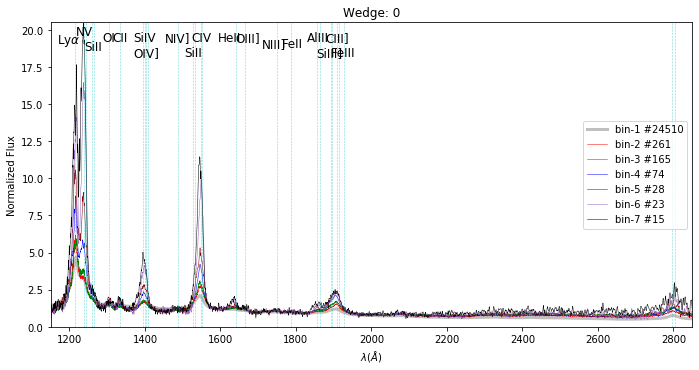

bin: 1 1150 to 1700
bin: 2 1150 to 1700
bin: 3 1150 to 1700
bin: 4 1150 to 1700
bin: 5 1150 to 1700
bin: 6 1150 to 1700
bin: 7 1150 to 1700


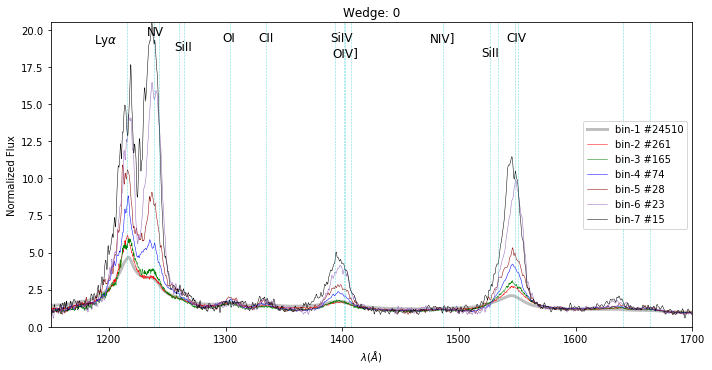

In [6]:
#Plotting 
# wdg=0
bin_label = np.loadtxt(dir + '/bin_label-bw-%.2f-wdg-%1d' %(bw, wdg)+'.txt')
bin_pop = np.loadtxt(dir + '/bin_pop-bw-%.2f-wdg-%1d' %(bw, wdg) +'.txt')
# tip_label = np.loadtxt(dir + '/tip_label_bw-%.2f' %(bw))
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage

# c = cm.get_cmap('coolwarm', 7)
c=['gray', 'red', 'green','blue', 'darkred', 'C4', 'black' ]
ymax=20.5
ymin=0.02*ymax
fs=12
fs1=12
y_median = 0.95*ymax
med_step=.8
legend_loc=7

# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
for ii in range(4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))

    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    x_median=lambda_min+200

    for b in range(1,nBin+1):
#     for b in range(len(bin_pop)):
        if(bin_pop[b-1]>=5):   
            print('bin:', b, lambda_min, 'to', lambda_max)
            medSpec=np.loadtxt(dir+ '/med-spec-bw-%.2f-wdg-%1d-bin-%1d.txt' %(bw, wdg, b))
            plt.ylabel('Normalized Flux')
            plt.xlabel(r'$\lambda  (\AA)$')


            if(bin_pop[b-1]<100):
                SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
            else:
                SmoothedMedSpec = medSpec

            # masking for plot ranges
            ind = (wgrid>lambda_min) & (wgrid<lambda_max)
            if(b>1):
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = .5, c=c[b-1], 
                         label='bin-%d #%d' %(b, bin_pop[b-1]))
            else:

                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 3, c=c[b-1], 
                         label='bin-%d #%d' %(b, tip_pop), alpha=0.5)



    plt.legend(loc=7)
    plt.title('Wedge: %d' %wdg)
    line_db( ymax, fs, fs1, ii) 
    fig_path = dir + '/med-spec-%d-%d-wdg-%d.png'%(lambda_min, lambda_max, wdg)

    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()